# Correlation and Association Measures Tutorial

This notebook covers methods to quantify relationships between variables:
- **Pearson correlation**: Linear relationship between continuous variables
- **Spearman correlation**: Monotonic relationship (rank-based)
- **Contingency tables & Chi-square test**: Association between categorical variables
- **Cramér's V**: Strength of association for categorical variables
- **Conditional correlation**: Correlation within subgroups

Examples use the Titanic dataset (df), exercises use the iris dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load datasets
df = sns.load_dataset('titanic')
iris = sns.load_dataset('iris')

# Preview Titanic data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
## 1. Pearson Correlation

**Pearson correlation coefficient (r)** measures the strength and direction of the **linear relationship** between two continuous variables.

$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

Values range from -1 (perfect negative) to +1 (perfect positive). Zero means no linear relationship.

**Example:**

In [2]:
# Calculate Pearson correlation between age and fare
# Using pandas .corr() method
corr_age_fare = df['age'].corr(df['fare'])
print(f"Pearson correlation (age vs fare): {corr_age_fare:.4f}")

Pearson correlation (age vs fare): 0.0961


In [3]:
# Correlation matrix for age and fare
df_clean = df[['age', 'fare']].dropna()
print(f"Pearson r = {df_clean['age'].corr(df_clean['fare']):.4f}")

Pearson r = 0.0961


In [4]:
# Correlation matrix for multiple variables
numeric_cols = df[['age', 'fare', 'sibsp', 'parch']].dropna()
corr_matrix = numeric_cols.corr(method='pearson')
print("Correlation Matrix:")
corr_matrix

Correlation Matrix:


,age,fare,sibsp,parch
age,1.000000,0.096067,-0.308247,-0.189119
fare,0.096067,1.000000,0.138329,0.205119
sibsp,-0.308247,0.138329,1.000000,0.383820
parch,-0.189119,0.205119,0.383820,1.000000


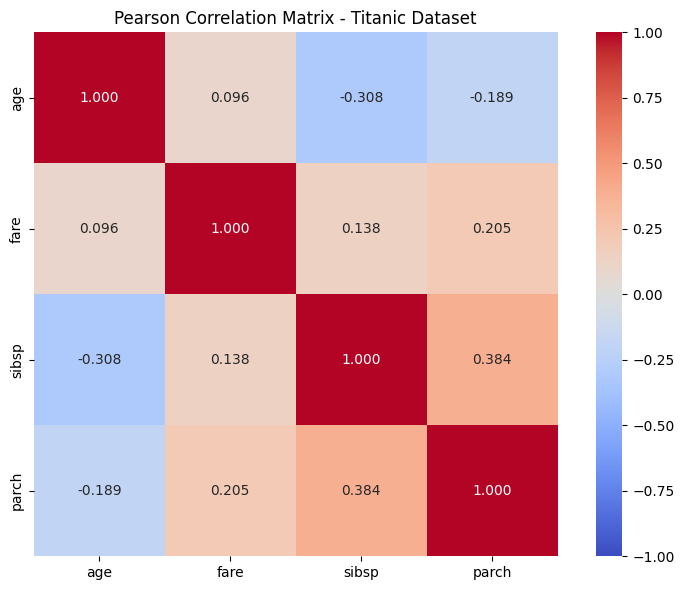

In [5]:
# Visualize correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            vmin=-1, vmax=1, fmt='.3f', square=True)
plt.title('Pearson Correlation Matrix - Titanic Dataset')
plt.tight_layout()
plt.show()

### Exercise 1: Pearson Correlation

**1.1** Calculate the Pearson correlation between `sepal_length` and `petal_length` in the iris dataset.

**1.2** Calculate the Pearson correlation between `sepal_width` and `petal_width` using pandas `.corr()` method.

**1.3** Create a correlation matrix for all numeric columns in iris and display it as a heatmap.

In [6]:
# Exercise 1.1: Pearson correlation between sepal_length and petal_length
# YOUR CODE HERE


In [7]:
# Exercise 1.2: Pearson correlation (sepal_width vs petal_width)
# YOUR CODE HERE


In [8]:
# Exercise 1.3: Correlation matrix heatmap for iris
# YOUR CODE HERE


---
## 2. Spearman Correlation

**Spearman's rank correlation (ρ)** measures the strength and direction of the **monotonic relationship** between two variables. It works on ranks instead of raw values, making it:
- Robust to outliers
- Suitable for ordinal data
- Able to detect non-linear monotonic relationships

$$\rho = 1 - \frac{6 \sum d_i^2}{n(n^2-1)}$$

where $d_i$ is the difference between ranks.

**Example:**

In [9]:
# Spearman correlation using pandas
spearman_corr = df['age'].corr(df['fare'], method='spearman')
print(f"Spearman correlation (age vs fare): {spearman_corr:.4f}")

Spearman correlation (age vs fare): 0.1351


In [10]:
# Spearman correlation using pandas
df_clean = df[['age', 'fare']].dropna()
rho = df_clean['age'].corr(df_clean['fare'], method='spearman')
print(f"Spearman ρ = {rho:.4f}")

Spearman ρ = 0.1351


In [ ]:
# Compare Pearson vs Spearman on data with outliers
np.random.seed(42)
x = np.arange(1, 21)
y = x + np.random.normal(0, 1, 20)
y_outlier = y.copy()
y_outlier[-1] = 100  # Add outlier

# Using pandas Series for correlation
x_series = pd.Series(x)
y_series = pd.Series(y)
y_outlier_series = pd.Series(y_outlier)

pearson_clean = x_series.corr(y_series)
spearman_clean = x_series.corr(y_series, method='spearman')
pearson_outlier = x_series.corr(y_outlier_series)
spearman_outlier = x_series.corr(y_outlier_series, method='spearman')

print("Without outlier:")
print(f"  Pearson r = {pearson_clean:.4f}, Spearman ρ = {spearman_clean:.4f}")
print("\nWith outlier:")
print(f"  Pearson r = {pearson_outlier:.4f}, Spearman ρ = {spearman_outlier:.4f}")
print("\n→ Spearman is more robust to outliers!")

Without outlier:
  Pearson r = 0.9900, Spearman ρ = 0.9895

With outlier:
  Pearson r = 0.5879, Spearman ρ = 0.9895

→ Spearman is more robust to outliers!


### Exercise 2: Spearman Correlation

**2.1** Calculate the Spearman correlation between `sepal_length` and `petal_length` in iris using pandas.

**2.2** Calculate the Spearman correlation between `sepal_width` and `petal_length` using pandas.

**2.3** Compare Pearson and Spearman correlations for all pairs of numeric variables in iris. Which pairs show the largest difference?

In [12]:
# Exercise 2.1: Spearman correlation (sepal_length vs petal_length)
# YOUR CODE HERE


In [13]:
# Exercise 2.2: Spearman correlation (sepal_width vs petal_length)
# YOUR CODE HERE


In [14]:
# Exercise 2.3: Compare Pearson vs Spearman matrices
# YOUR CODE HERE


---
## 3. Contingency Tables and Chi-Square Test

**Contingency tables** (cross-tabulations) show the frequency distribution of categorical variables. The **Chi-square test** measures the association between them.

$$\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$$

where $O_{ij}$ = observed frequency, $E_{ij}$ = expected frequency under independence.

**Example:**

In [15]:
# Create contingency table: survival by passenger class
contingency = pd.crosstab(df['pclass'], df['survived'])
print("Contingency Table: Passenger Class vs Survival")
contingency

Contingency Table: Passenger Class vs Survival


survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [16]:
# Chi-square test of independence
chi2, _, dof, expected_freq = stats.chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"\nExpected frequencies under independence:")
print(pd.DataFrame(expected_freq, 
                   index=contingency.index, 
                   columns=contingency.columns).round(2))

Chi-square statistic: 102.8890
Degrees of freedom: 2

Expected frequencies under independence:
survived       0       1
pclass                  
1         133.09   82.91
2         113.37   70.63
3         302.54  188.46


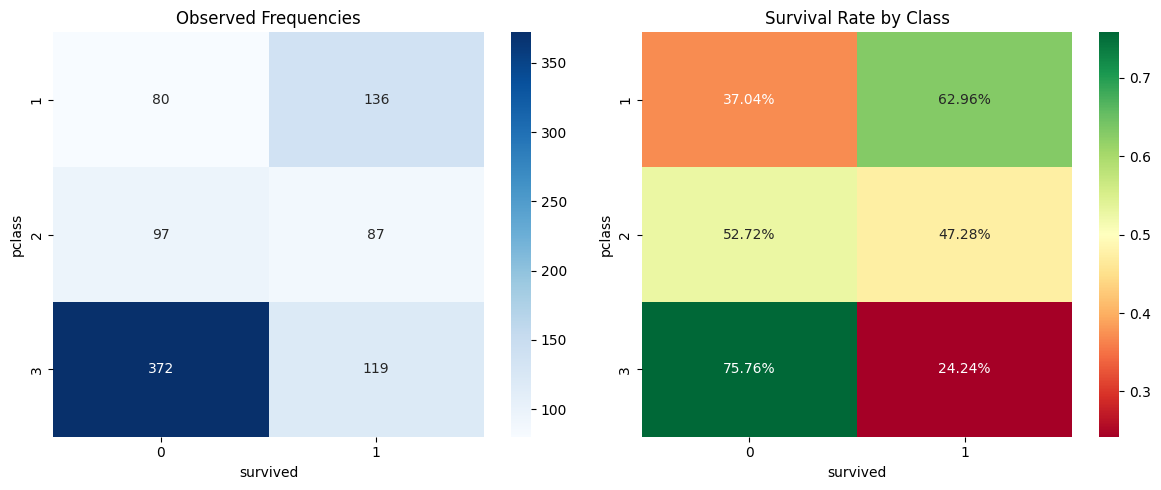

In [17]:
# Visualize contingency table
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Raw counts
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Observed Frequencies')

# Normalized by row (survival rate per class)
contingency_norm = pd.crosstab(df['pclass'], df['survived'], normalize='index')
sns.heatmap(contingency_norm, annot=True, fmt='.2%', cmap='RdYlGn', ax=axes[1])
axes[1].set_title('Survival Rate by Class')

plt.tight_layout()
plt.show()

### Exercise 3: Contingency Tables

**3.1** Create a categorical column in iris: `sepal_size` based on `sepal_length` (Small: < 5.5, Medium: 5.5-6.5, Large: > 6.5).

**3.2** Create a contingency table between `species` and `sepal_size`.

**3.3** Perform a chi-square test. Calculate the chi-square statistic for species and sepal size.

**3.4** Visualize the contingency table as a heatmap with row-normalized proportions.

In [18]:
# Exercise 3.1: Create sepal_size categorical column
# YOUR CODE HERE


In [19]:
# Exercise 3.2: Contingency table (species vs sepal_size)
# YOUR CODE HERE


In [20]:
# Exercise 3.3: Chi-square test
# YOUR CODE HERE


In [21]:
# Exercise 3.4: Heatmap visualization
# YOUR CODE HERE


---
## 4. Cramér's V

**Cramér's V** measures the strength of association between two categorical variables, based on the chi-square statistic. It ranges from 0 (no association) to 1 (perfect association).

$$V = \sqrt{\frac{\chi^2}{n \cdot \min(r-1, c-1)}}$$

where $n$ = sample size, $r$ = number of rows, $c$ = number of columns.

**Interpretation guidelines:**
- V < 0.1: Negligible
- 0.1 ≤ V < 0.3: Small
- 0.3 ≤ V < 0.5: Medium
- V ≥ 0.5: Large

**Example:**

In [22]:
def cramers_v(contingency_table):
    """Calculate Cramér's V from a contingency table."""
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, c = contingency_table.shape
    return np.sqrt(chi2 / (n * min(r-1, c-1)))

# Calculate Cramér's V for passenger class vs survival
contingency = pd.crosstab(df['pclass'], df['survived'])
v = cramers_v(contingency)
print(f"Cramér's V (pclass vs survived): {v:.4f}")

Cramér's V (pclass vs survived): 0.3398


In [23]:
# Compare association strength for different variable pairs
pairs = [
    ('pclass', 'survived'),
    ('sex', 'survived'),
    ('embarked', 'pclass'),
    ('sex', 'pclass')
]

print("Cramér's V for different variable pairs:")
print("-" * 40)
for var1, var2 in pairs:
    ct = pd.crosstab(df[var1].dropna(), df[var2].dropna())
    v = cramers_v(ct)
    print(f"{var1:12s} vs {var2:12s}: V = {v:.4f}")

Cramér's V for different variable pairs:
----------------------------------------
pclass       vs survived    : V = 0.3398
sex          vs survived    : V = 0.5409
embarked     vs pclass      : V = 0.2638
sex          vs pclass      : V = 0.1380


### Exercise 4: Cramér's V

**4.1** Calculate Cramér's V for the association between `species` and `sepal_size` in iris.

**4.2** Create another categorical variable `petal_size` (Small: < 2.5, Medium: 2.5-5, Large: > 5 based on `petal_length`) and calculate Cramér's V between `species` and `petal_size`.

**4.3** Which variable (`sepal_size` or `petal_size`) has a stronger association with species?

In [24]:
# Exercise 4.1: Cramér's V for species vs sepal_size
# YOUR CODE HERE


In [25]:
# Exercise 4.2: Create petal_size and calculate Cramér's V with species
# YOUR CODE HERE


In [26]:
# Exercise 4.3: Compare association strengths
# YOUR CODE HERE


---
## 5. Conditional Correlation

**Conditional correlation** examines the relationship between two variables within subgroups defined by a third variable. This helps:
- Detect **Simpson's Paradox** (overall correlation differs from within-group correlations)
- Control for confounding variables
- Understand heterogeneous relationships

**Example:**

In [27]:
# Overall correlation: age vs fare
overall_corr = df['age'].corr(df['fare'])
print(f"Overall Pearson correlation (age vs fare): {overall_corr:.4f}")

Overall Pearson correlation (age vs fare): 0.0961


In [28]:
# Conditional correlation: age vs fare BY passenger class
print("\nConditional correlations by passenger class:")
print("-" * 40)

for pclass in sorted(df['pclass'].dropna().unique()):
    subset = df[df['pclass'] == pclass][['age', 'fare']].dropna()
    if len(subset) > 2:
        r = subset['age'].corr(subset['fare'])
        print(f"Class {pclass}: r = {r:.4f} (n={len(subset)})")


Conditional correlations by passenger class:
----------------------------------------
Class 1: r = -0.2186 (n=186)
Class 2: r = -0.1970 (n=173)
Class 3: r = -0.2603 (n=355)


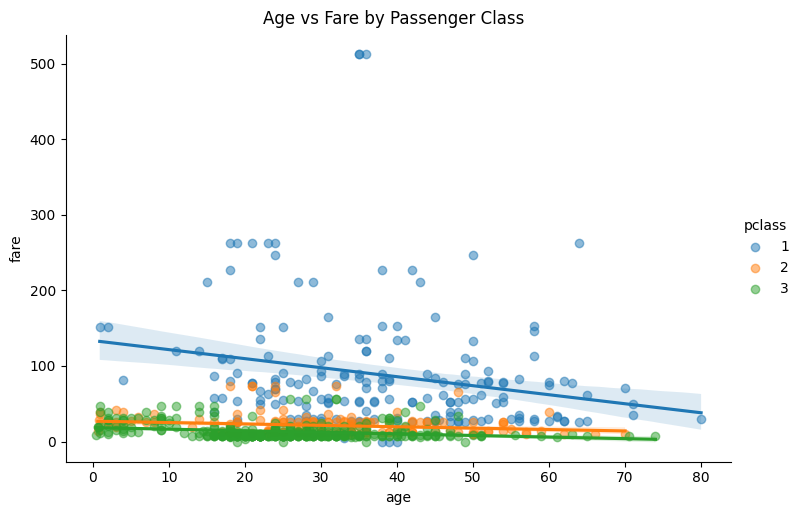

In [29]:
# Visualize conditional correlations
g = sns.lmplot(data=df, x='age', y='fare', hue='pclass', 
               height=5, aspect=1.5, scatter_kws={'alpha': 0.5})
g.figure.suptitle('Age vs Fare by Passenger Class', y=1.02)
plt.show()

In [30]:
# Simpson's Paradox Example: sex, class, and survival
print("Survival rate by sex (overall):")
print(df.groupby('sex')['survived'].mean())

print("\nSurvival rate by sex AND class:")
print(df.groupby(['pclass', 'sex'])['survived'].mean().unstack())

Survival rate by sex (overall):
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Survival rate by sex AND class:
sex       female      male
pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [ ]:
# Function to compute conditional correlations systematically
def conditional_correlation(data, var1, var2, condition_var, method='pearson'):
    """Calculate correlation between var1 and var2 for each level of condition_var."""
    results = []
    
    for level in data[condition_var].dropna().unique():
        subset = data[data[condition_var] == level][[var1, var2]].dropna()
        if len(subset) > 2:
            if method == 'pearson':
                r = subset[var1].corr(subset[var2])
            else:
                r = subset[var1].corr(subset[var2], method='spearman')
            results.append({
                'condition': level,
                'correlation': r,
                'n': len(subset)
            })
    
    return pd.DataFrame(results)

# Example usage
cond_corr = conditional_correlation(df, 'age', 'fare', 'pclass')
print("Conditional correlations (age vs fare by class):")
cond_corr

Conditional correlations (age vs fare by class):


,condition,correlation,p_value,n
0,3,-0.260315,6.578547e-07,355
1,1,-0.218611,2.720260e-03,186
2,2,-0.197038,9.366733e-03,173


### Exercise 5: Conditional Correlation

**5.1** Calculate the overall Pearson correlation between `sepal_length` and `petal_length` in iris.

**5.2** Calculate the conditional correlation between `sepal_length` and `petal_length` for each species.

**5.3** Create a scatter plot with regression lines for each species (use `sns.lmplot`).

**5.4** Does the relationship between sepal and petal length differ across species? Discuss Simpson's Paradox if applicable.

In [32]:
# Exercise 5.1: Overall correlation (sepal_length vs petal_length)
# YOUR CODE HERE


In [33]:
# Exercise 5.2: Conditional correlations by species
# YOUR CODE HERE


In [34]:
# Exercise 5.3: Scatter plot with regression lines by species
# YOUR CODE HERE


In [35]:
# Exercise 5.4: Discussion of results
# YOUR ANALYSIS HERE (can be markdown)


---
## 6. Summary: Choosing the Right Measure

| Data Types | Measure | Use When |
|------------|---------|----------|
| Continuous vs Continuous | Pearson r | Linear relationship assumed |
| Continuous vs Continuous | Spearman ρ | Monotonic relationship, outliers present, ordinal data |
| Categorical vs Categorical | Chi-square test | Testing independence |
| Categorical vs Categorical | Cramér's V | Measuring association strength |
| Any | Conditional correlation | Controlling for confounders, subgroup analysis |

**Key Takeaways:**
1. Always visualize data before calculating correlations
2. Correlation ≠ Causation
3. Check for non-linear patterns that linear measures might miss
4. Consider confounders and calculate conditional correlations
5. For categorical variables, use appropriate measures (Chi-square, Cramér's V)

---
## 7. Comprehensive Exercise

Using the Titanic dataset, perform a complete association analysis:

**7.1** Create a categorical age variable: `age_group` (Child: < 18, Adult: 18-60, Senior: > 60)

**7.2** Analyze the association between `age_group` and `survived`:
   - Create a contingency table
   - Perform chi-square test
   - Calculate Cramér's V
   - Visualize with a heatmap

**7.3** Calculate conditional correlation between `age` and `fare` grouped by `sex`

**7.4** Create a summary visualization showing:
   - Correlation heatmap of numeric variables
   - Bar plot of survival rates by age group and sex

In [36]:
# Exercise 7.1: Create age_group
# YOUR CODE HERE


In [37]:
# Exercise 7.2: Association analysis (age_group vs survived)
# YOUR CODE HERE


In [38]:
# Exercise 7.3: Conditional correlation (age vs fare by sex)
# YOUR CODE HERE


In [39]:
# Exercise 7.4: Summary visualization
# YOUR CODE HERE


In [40]:
# Create contingency table: survival by passenger class
contingency = pd.crosstab(df['pclass'], df['survived'])
print("Contingency Table: Passenger Class vs Survival")
contingency

Contingency Table: Passenger Class vs Survival


survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119
